In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from gen import Generator
from disc import Discriminator
from utils import wasserstein1d

from showprogress import showprogress
from telepyth import TelepythClient
tp = TelepythClient()

Use token from .telepythrc.


# Using CIFAR 10 dataset

In [2]:
imsize = 64
c = 3

In [3]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10, LSUN

batch_size = 64
test_batch_size = 1000
use_cuda = torch.cuda.is_available()

dataset = CIFAR10
dataset_name = 'CIFAR10'

kwargs = {'num_workers': 10, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    dataset('/data/%s' % dataset_name, 
                train=True,
                transform=transforms.Compose([
                    transforms.Resize(imsize),
                    transforms.CenterCrop(imsize),
                    transforms.ToTensor()
                ])),
    batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    dataset('/data/%s' % dataset_name,
                train=False,
                transform=transforms.Compose([
                    transforms.Resize(imsize),
                    transforms.CenterCrop(imsize),
                    transforms.ToTensor()
                ])),
    batch_size=test_batch_size, shuffle=False, **kwargs)

torch.Size([3, 64, 64])


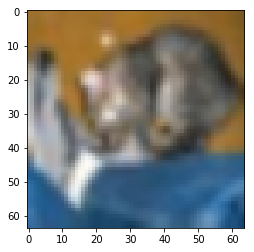

In [4]:
image = iter(test_loader).next()[0]
im = image[0]
print(im.shape)
plt.imshow(np.transpose(im, (1,2,0)), interpolation='nearest')

# Model

In [5]:
d = 100
nprojections = 10000
num_epochs = 20
notify_every = 5 # send telegram notification every 5 epochs
show_every = 250
use_D = True
x_dim = imsize*imsize*c

In [6]:
z_fixed = torch.rand(9, d, device=device) * 2 - 1
z_fixed_ = torch.rand(81, d, device=device) * 2 - 1

In [7]:
G = Generator(d).to(device)
g_opt = optim.Adam(G.parameters(), lr=1e-4)

D = Discriminator(c).to(device)
d_criterion = nn.BCEWithLogitsLoss()
d_opt = optim.Adam(D.parameters(), lr=1e-4)

if use_D:
    dim = D.f_dim
else:
    dim = x_dim

# Train

[============================================================] 20/20

Epoch 1 iter 250: G loss 863.388, D loss 0.066


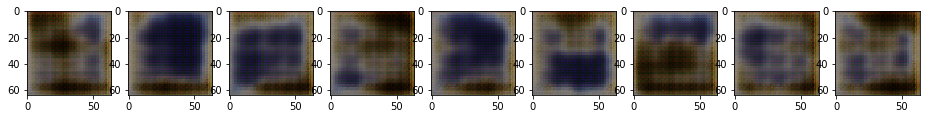

Epoch 1 iter 500: G loss 527.015, D loss 0.134


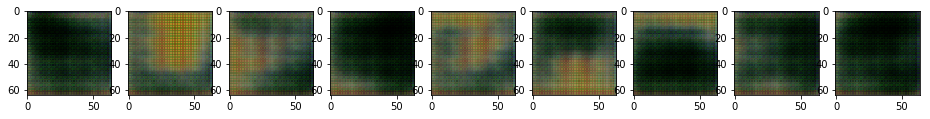

Epoch 1 iter 750: G loss 908.315, D loss 0.020


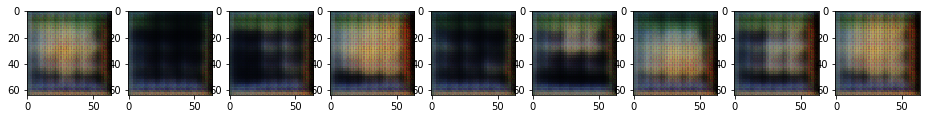

Epoch 2 iter 250: G loss 605.644, D loss 0.019


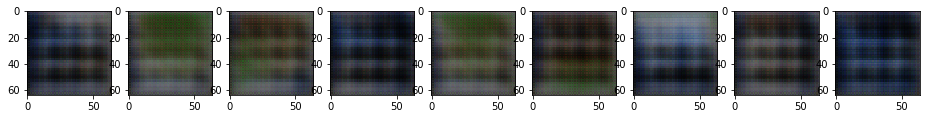

Epoch 2 iter 500: G loss 467.050, D loss 0.016


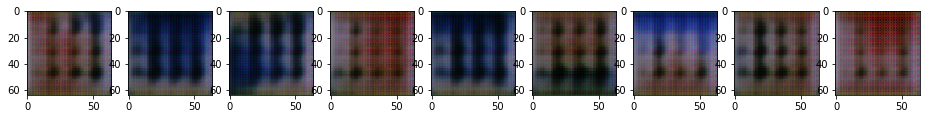

Epoch 2 iter 750: G loss 408.389, D loss 0.140


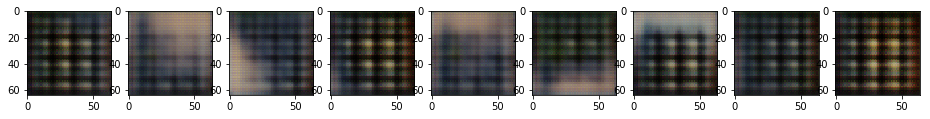

Epoch 3 iter 250: G loss 387.191, D loss 0.155


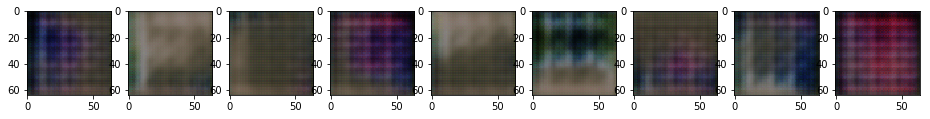

Epoch 3 iter 500: G loss 257.075, D loss 0.039


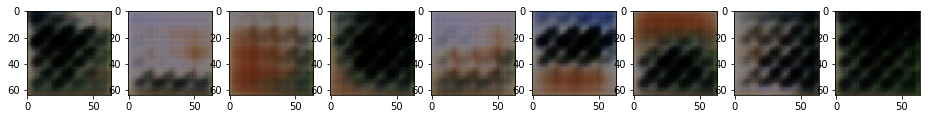

Epoch 3 iter 750: G loss 205.337, D loss 0.166


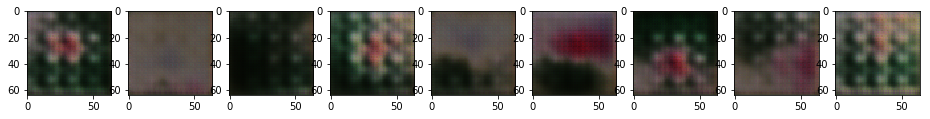

Epoch 4 iter 250: G loss 159.508, D loss 0.211


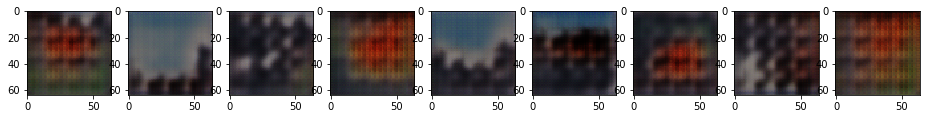

Epoch 4 iter 500: G loss 267.085, D loss 0.193


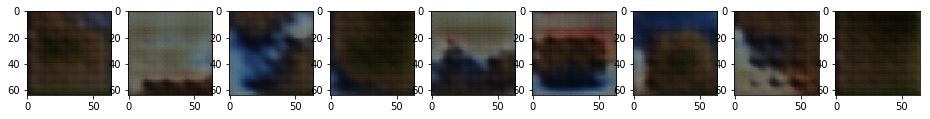

Epoch 4 iter 750: G loss 189.949, D loss 0.080


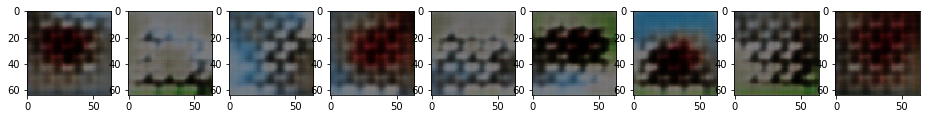

Epoch 5 iter 250: G loss 163.842, D loss 0.186


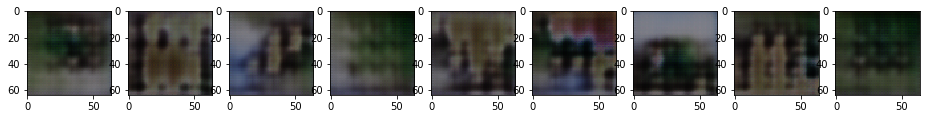

Epoch 5 iter 500: G loss 307.830, D loss 0.072


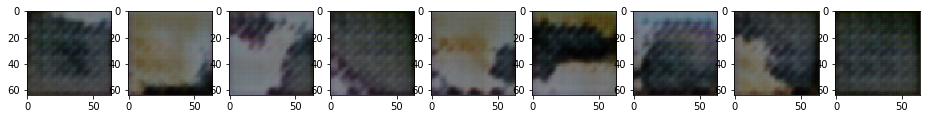

Epoch 5 iter 750: G loss 153.239, D loss 0.094


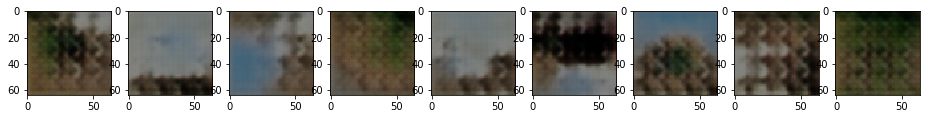

Epoch 6 iter 250: G loss 144.652, D loss 0.432


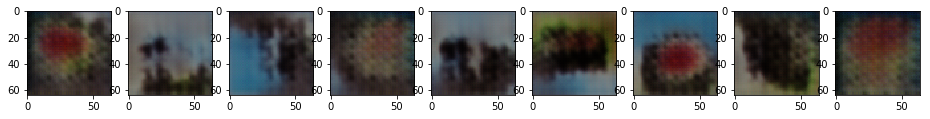

Epoch 6 iter 500: G loss 178.004, D loss 0.204


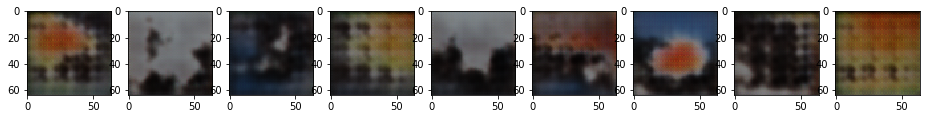

Epoch 6 iter 750: G loss 165.501, D loss 0.106


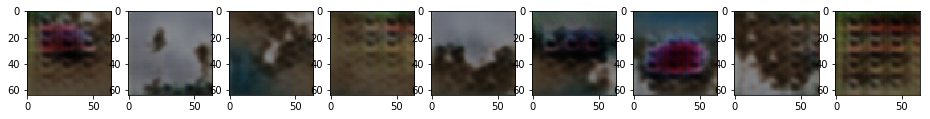

Epoch 7 iter 250: G loss 166.987, D loss 0.308


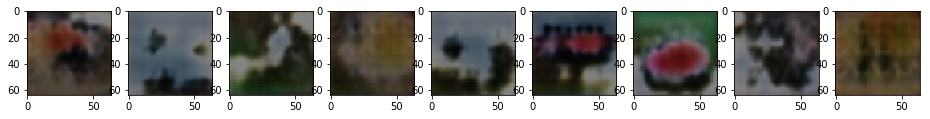

Epoch 7 iter 500: G loss 155.363, D loss 0.238


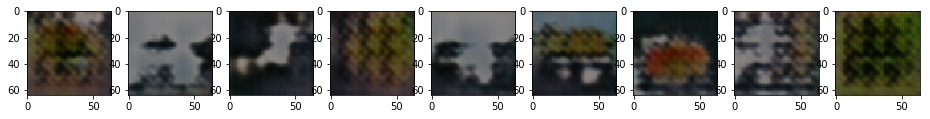

Epoch 7 iter 750: G loss 169.637, D loss 0.134


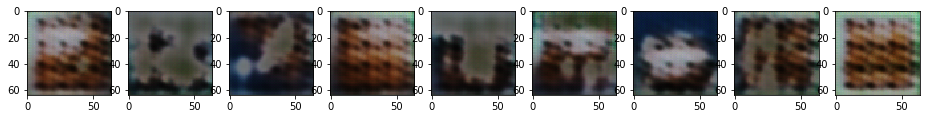

Epoch 8 iter 250: G loss 165.977, D loss 0.064


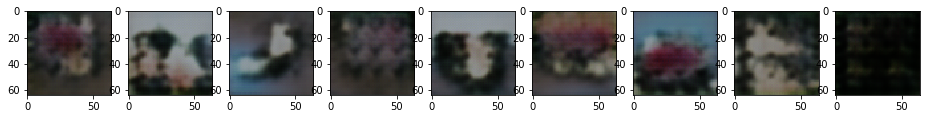

Epoch 8 iter 500: G loss 160.377, D loss 0.245


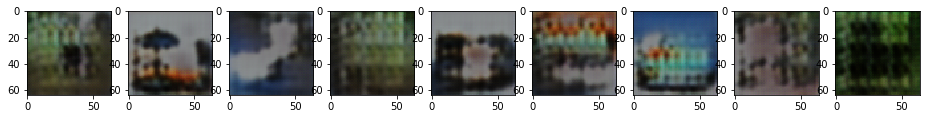

Epoch 8 iter 750: G loss 216.869, D loss 0.189


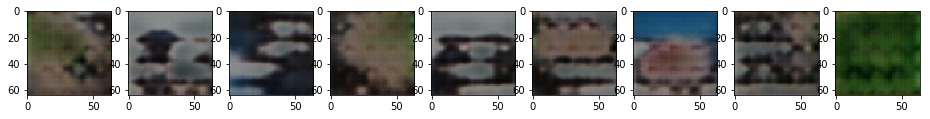

Epoch 9 iter 250: G loss 157.503, D loss 0.146


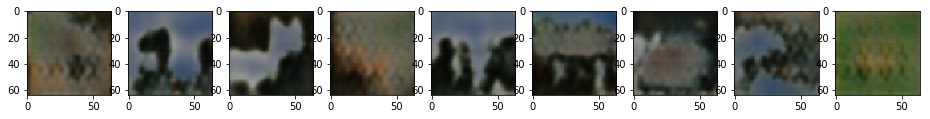

Epoch 9 iter 500: G loss 158.987, D loss 0.366


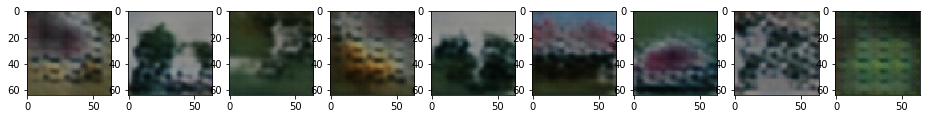

Epoch 9 iter 750: G loss 142.599, D loss 0.099


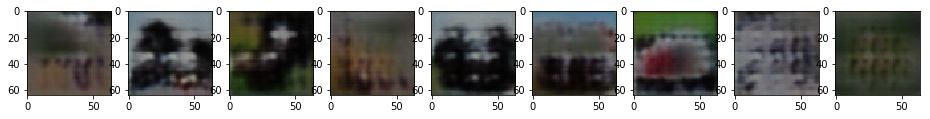

Epoch 10 iter 250: G loss 123.628, D loss 0.379


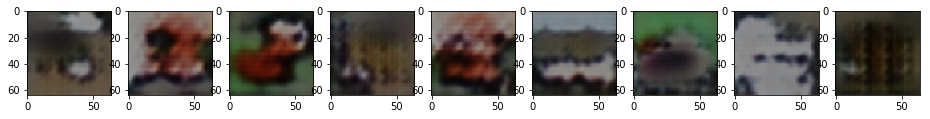

Epoch 10 iter 500: G loss 193.878, D loss 0.259


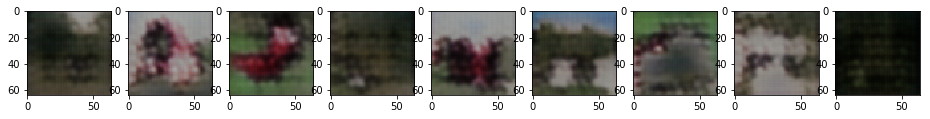

Epoch 10 iter 750: G loss 175.566, D loss 0.468


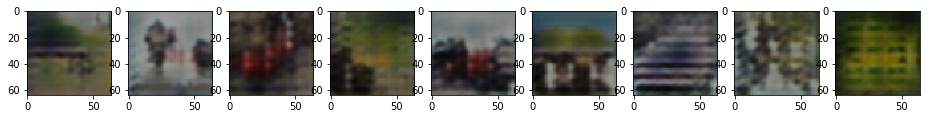

Epoch 11 iter 250: G loss 197.879, D loss 0.166


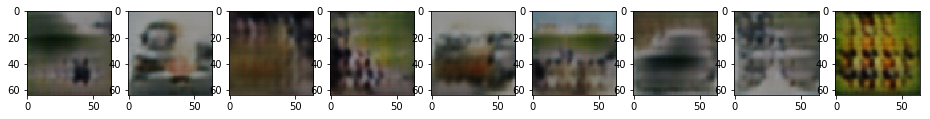

Epoch 11 iter 500: G loss 158.910, D loss 0.117


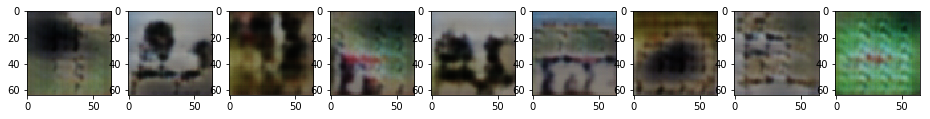

Epoch 11 iter 750: G loss 168.264, D loss 0.463


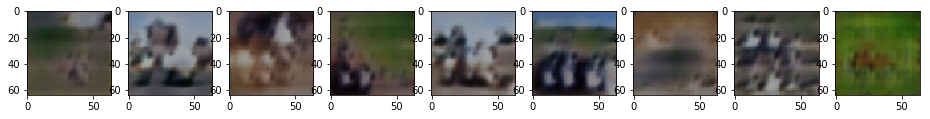

Epoch 12 iter 250: G loss 136.122, D loss 0.330


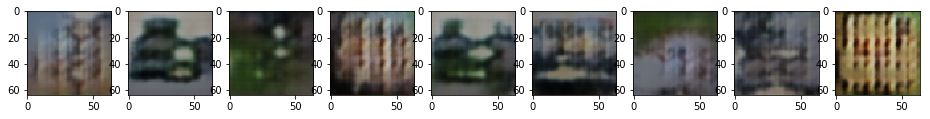

Epoch 12 iter 500: G loss 175.201, D loss 0.121


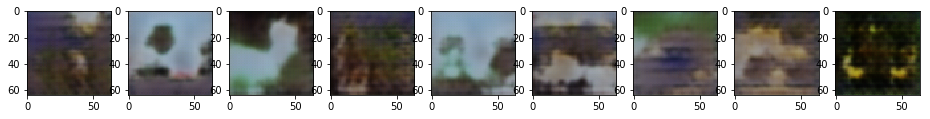

Epoch 12 iter 750: G loss 132.374, D loss 0.219


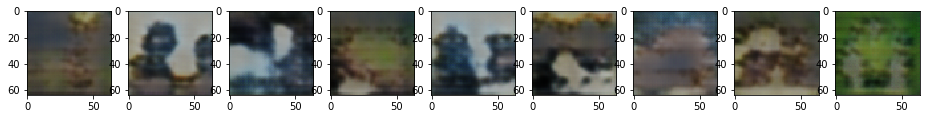

Epoch 13 iter 250: G loss 121.459, D loss 0.291


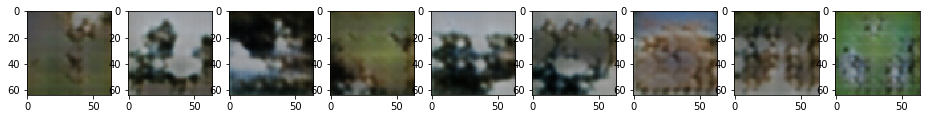

Epoch 13 iter 500: G loss 163.220, D loss 0.054


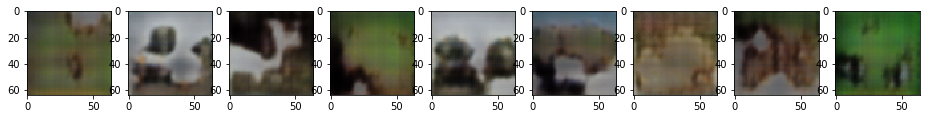

Epoch 13 iter 750: G loss 153.425, D loss 0.254


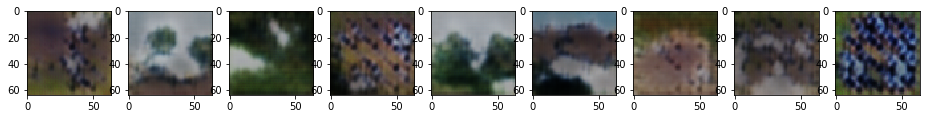

Epoch 14 iter 250: G loss 139.375, D loss 0.310


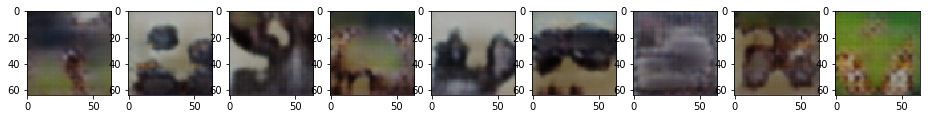

Epoch 14 iter 500: G loss 136.305, D loss 0.120


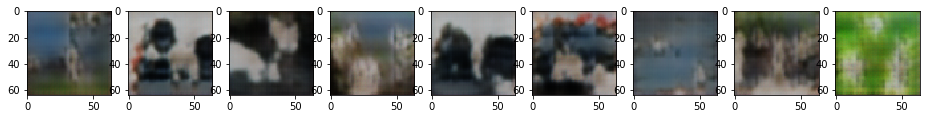

Epoch 14 iter 750: G loss 149.222, D loss 0.056


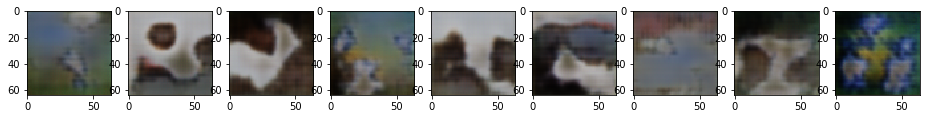

Epoch 15 iter 250: G loss 168.720, D loss 0.171


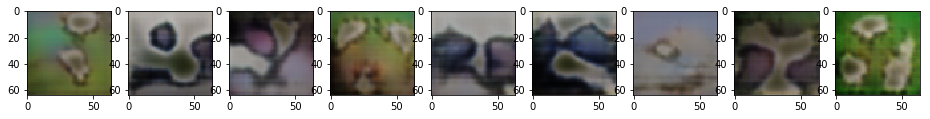

Epoch 15 iter 500: G loss 163.274, D loss 0.629


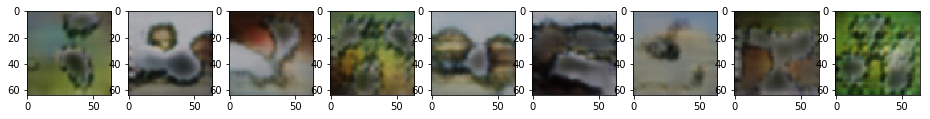

Epoch 15 iter 750: G loss 172.691, D loss 0.181


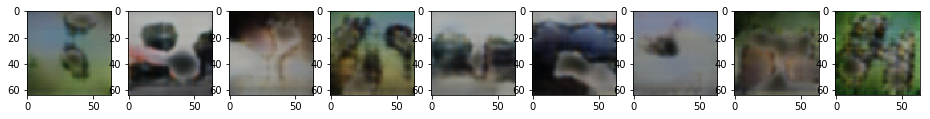

Epoch 16 iter 250: G loss 147.598, D loss 0.107


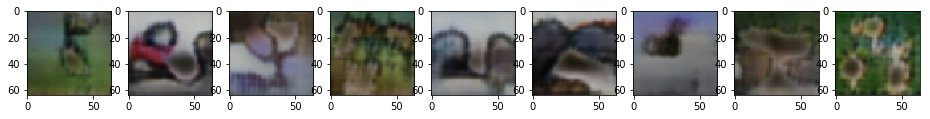

Epoch 16 iter 500: G loss 193.959, D loss 0.244


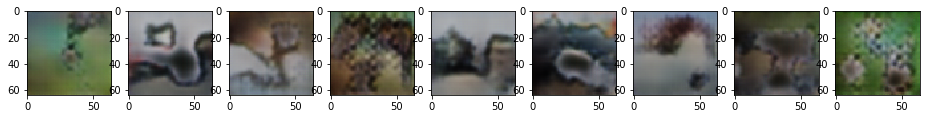

Epoch 16 iter 750: G loss 179.965, D loss 0.557


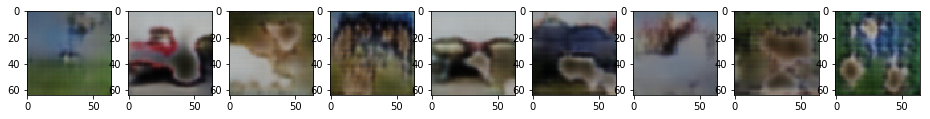

Epoch 17 iter 250: G loss 339.361, D loss 0.172


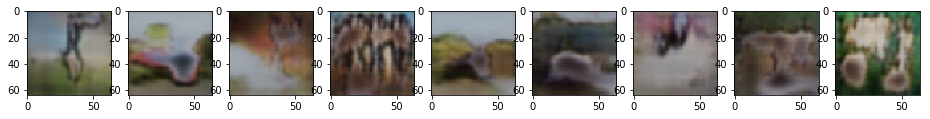

Epoch 17 iter 500: G loss 241.212, D loss 0.056


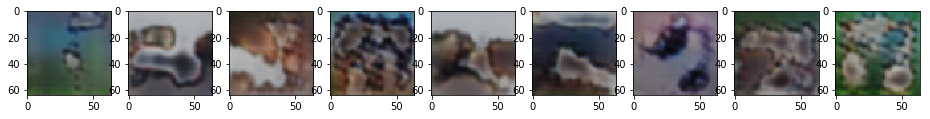

Epoch 17 iter 750: G loss 148.650, D loss 0.138


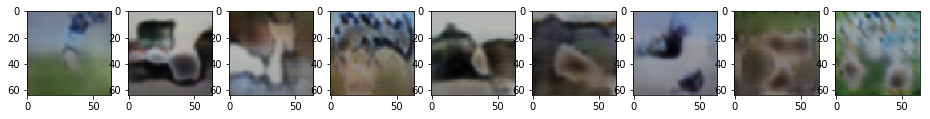

Epoch 18 iter 250: G loss 143.472, D loss 0.103


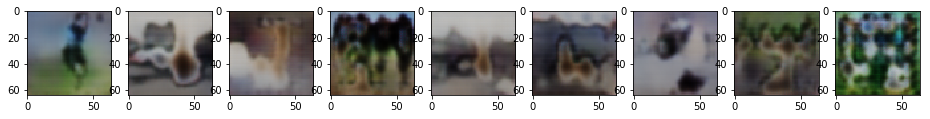

Epoch 18 iter 500: G loss 126.713, D loss 0.063


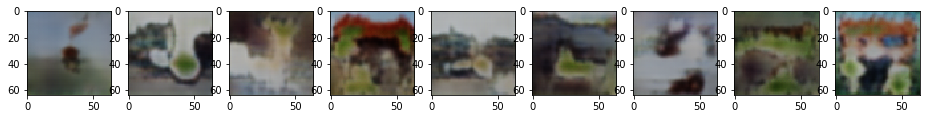

Epoch 18 iter 750: G loss 151.202, D loss 0.079


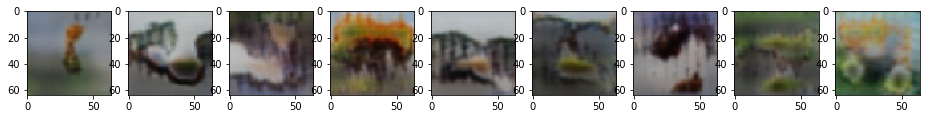

Epoch 19 iter 250: G loss 534.878, D loss 0.037


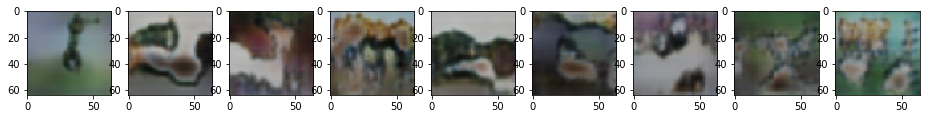

Epoch 19 iter 500: G loss 263.362, D loss 0.057


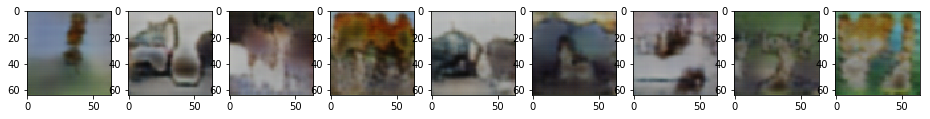

Epoch 19 iter 750: G loss 129.013, D loss 2.438


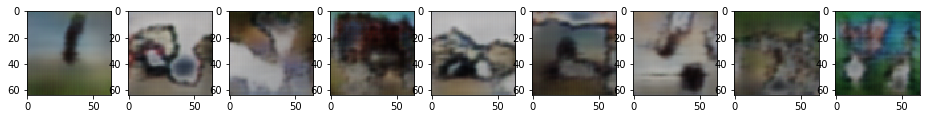

Epoch 20 iter 250: G loss 165.577, D loss 0.042


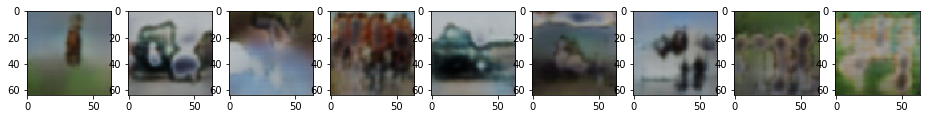

Epoch 20 iter 500: G loss 144.300, D loss 0.038


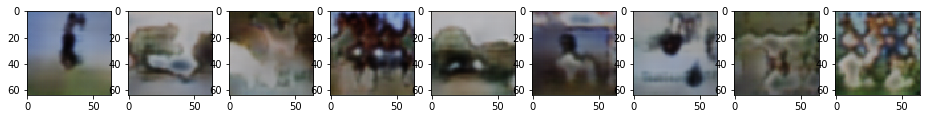

Epoch 20 iter 750: G loss 214.261, D loss 0.016


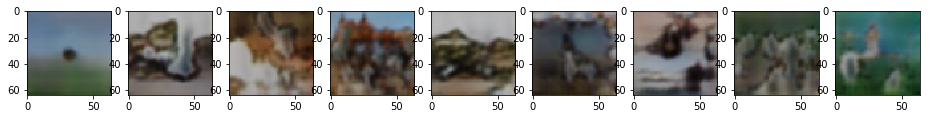

In [8]:
for epoch in showprogress(total=num_epochs):
    for i, (batch_x, _) in enumerate(train_loader):
        G.train()

        # Generator step
        x = batch_x.to(device)
        z = torch.rand(batch_x.size(0), d,
                        requires_grad=False,
                        device=device) * 2 - 1
        # sample random projections
        theta = torch.randn((dim, nprojections),
                            requires_grad=False,
                            device=device)
        theta = theta/torch.norm(theta, dim=0)[None, :]
        xpred = G(z)
        
        if use_D:
            _, fake_features = D(xpred) # get image features from Discriminator
            xpred_1d = fake_features@theta

            _, true_features = D(x)
            x_1d = true_features.detach()@theta
            
        else:
            xpred_1d = xpred.view(-1, x_dim)@theta
            x_1d = x.view(-1, x_dim)@theta

        # compute sliced wasserstein distance on projected features
        gloss = wasserstein1d(xpred_1d, x_1d)
        
        g_opt.zero_grad()
        gloss.backward()
        g_opt.step()

        if use_D:
            # Discriminator step
            z = torch.rand(batch_x.size(0), d,
                            requires_grad=False,
                            device=device) * 2 - 1
            xpred = G(z).detach()
            fake_score, _ = D(xpred)
            true_score, _ = D(x)

            dloss_fake = d_criterion(fake_score, torch.zeros_like(fake_score))
            dloss_true = d_criterion(true_score, torch.ones_like(true_score))
            dloss = dloss_fake.mean() + dloss_true.mean()

            d_opt.zero_grad()
            dloss.backward()
            d_opt.step()

        # show logs
        if (i + 1) % show_every == 0:
            G.eval()
            samples = G(z_fixed).detach().permute(0,2,3,1)
            
            if use_D:
                status = 'Epoch %d iter %d: G loss %.3f, D loss %.3f' % \
                      (epoch+1, i+1, gloss.item(), dloss.item())
                
            else:
                status = 'Epoch %d iter %d: G loss %.3f' % \
                      (epoch+1, i+1, gloss.item())
            print(status)
            fig = plt.figure(figsize=(16,16))
            for j in range(9):
                plt.subplot(191+j)
                plt.imshow(samples[j])
            plt.show()

    # notify in Telegram messenger
    if epoch+1 % notify_every == 0:
        tp.send_figure(fig, status)

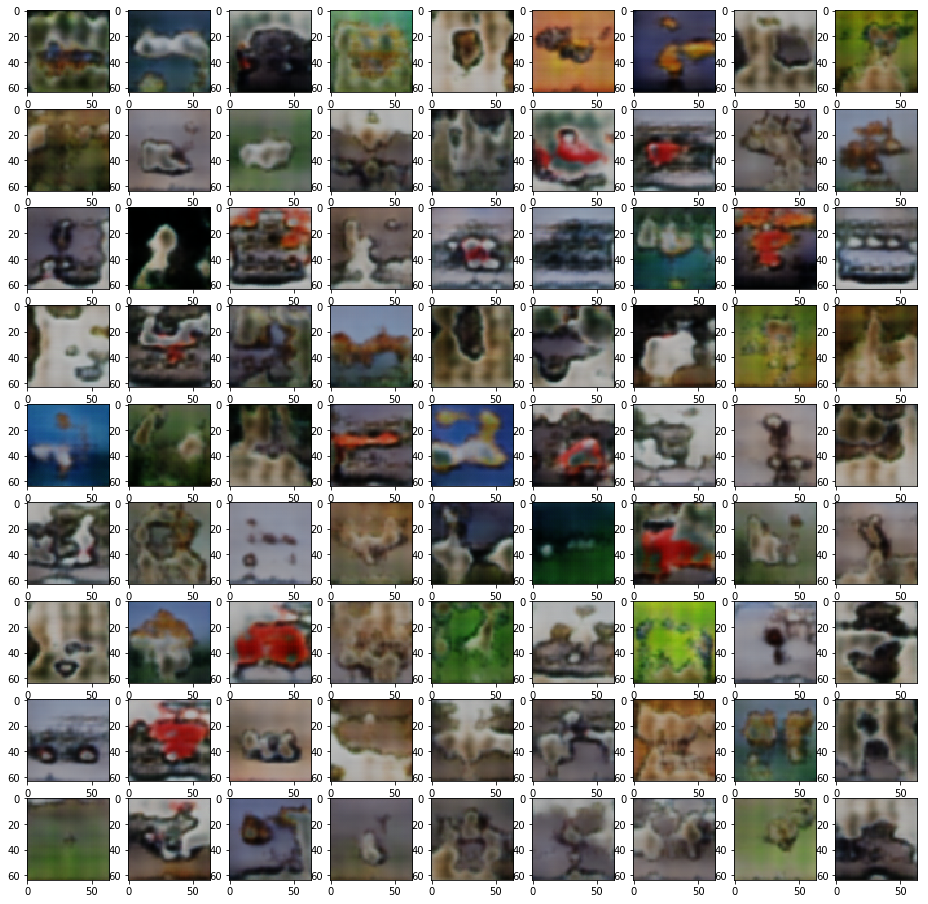

In [9]:
samples = G(z_fixed_).detach().permute(0,2,3,1)
fig = plt.figure(figsize=(16,16))
for i in range(9):
    for j in range(9):
        plt.subplot(9, 9, i*9+j+1)
        plt.imshow(samples[i*9+j])
plt.show()

In [10]:
tp.send_figure(fig, 'Samples')

200